# Capstone Project (1003)

# HR Advisories
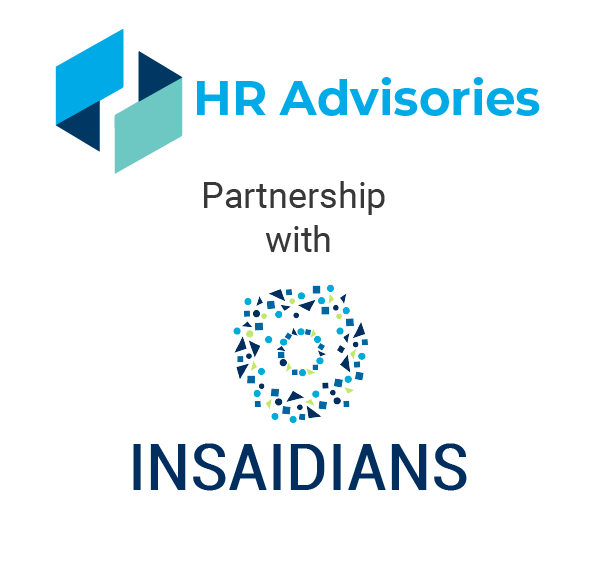

---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description and Data Information**](#Section41)
  - **4.2** [**Numerical Data Distribution**](#Section42)
  - **4.3** [**Pre Profiling Report**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Identification & Handling of Missing Data**](#Section51)
  - **5.2** [**Identification & Handling of Redundant Data**](#Section52)
  - **5.3** [**Handling Typo**](#Section53)
  - **5.4** [**Merging**](#Section54)
  - **5.5** [**Post Profiling Report**](#Section55)

**6.** [**Categorical Feature Encoding**](#Section6)<br>
**7.** [**Exploratory Data Analysis**](#Section7)<br>
**8.** [**Machine Learning Models**](#Section8)<br>
 - **8.1** [**Train Test Split**](#Section81)
 - **8.2** [**Cross Validation**](#Section82)
 - **8.3** [**Feature Importance**](#Section83)
 - **8.4** [**Scaling**](#Section84)
 - **8.5** [**Models**](#Section85)
 - **8.6** [**Model Ranking**](#Section86)

**9.** [**Processing Unseen Data**](#Section9)<br>
 

**10.** [**Publishing the Results**](#Section10)<br>

---

<a id = Section1></a>

---
# **1. Introduction**
---
Human Resourse management is the most crusial task and so is the significance of HR department of any organization.HR retention can best be acheived by gaining insight into the data which is obtained from exist interview of the employees who have left. Retention  of productive employees is a major concern of HR professionals and business executives. It is more efficient to retain a quality employee than to recruit, train and orient a replacement employee of the same quality.
The client for this project is the HR Department at a software company.
- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

**Current Practice**
- Once an employee leaves, he or she is taken an interview with the name `exit interview` and shares reasons for leaving. 
- The HR Department then tries and learns insights from the interview and makes changes accordingly.
- This suffers from the following problems:
  - This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
  - The second problem is these insights can't be aggregated and interlaced across all employees who have left.
  - The third is that it is too late by the time the proposed policy changes take effect.



<a id = Section2></a>

---
# **2. Problem Statement**
- Given datasets of past employees and their status (still employed or already left),build a classification model using the datasets.

<a id = Section3></a>


# **3. Installing & Importing Libraries**
- Installed and imported pymysql and pymysql.cursors to establish connection with the remote database.
- Using Pandas library fetched the data into dataframe.
- In order to smooten the further operations with the data, saved the data to csv file on local drive and pulled it back to dataframe.


In [3]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport

# convert categorical data to numerical data using encoding technique
from sklearn import preprocessing

# import the required packages from sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline



In [2]:
import pymysql
import pymysql.cursors

con = pymysql.connect('cpanel.insaid.co','student','student','Capstone2')


<a id=Section4></a>

# **4. Data Acquisition & Description**


### Week I Task:
- Retrive data from database.

In [10]:
with con:

    cur = con.cursor()
    cur.execute("select count(*) from department_data")

    rows = cur.fetchall()
    

    

In [11]:
print(rows)

((11,),)


In [12]:
query1="select * from department_data"
dfdd = pd.read_sql(query1, con)
dfdd

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [14]:
dfdd.to_csv('department_data.csv',index=False)

In [13]:
with con:
    cur2 = con.cursor()
    cur2.execute("select count(*) from employee_details_data")

    rows2 = cur2.fetchall()
    

In [15]:
print(rows2)

((14245,),)


In [16]:
query2="select * from employee_details_data"
dfed = pd.read_sql(query2, con)
dfed

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married
...,...,...,...,...
14240,111781,26,Male,Unmarried
14241,100372,35,Male,Married
14242,128083,30,Female,Married
14243,118487,24,Male,Unmarried


In [17]:
dfed.to_csv('employee_details_data.csv',index=False)

In [18]:
with con:
    cur3 = con.cursor()
    cur3.execute("select count(*) from employee_data")

    rows3 = cur3.fetchall()
    

In [19]:
print(rows3)

((14150,),)


In [20]:
query3="select * from employee_data"
dfedata = pd.read_sql(query3, con)
dfedata

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707
...,...,...,...,...,...,...,...,...,...,...,...
14145,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,NaN,0.951901,3,NaN,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,NaN,0.900887,5,NaN,medium,0.906613,Left,5.0,115325


In [21]:
dfedata.to_csv('employee_data.csv',index=False)

In [156]:
df1=pd.read_csv('department_data.csv')
df1

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [157]:
df2=pd.read_csv('employee_details_data.csv')
df2.head(5)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [158]:
df3=pd.read_csv('employee_data.csv')
df3.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [159]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(11, 3)
(14245, 4)
(14150, 11)


<a id = Section41></a>
### **4.1 Data Description and Data Information**

- In this section we will get **information about the data** and see some observations.

## Data Description
The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

- **department_data**: 
  This dataset contains information about each department. The schema of the dataset is as follows:
        dept_id – Unique Department Code
        dept_name – Name of the Department
        dept_head – Name of the Head of the Department

- **employee_details_data**: 
  This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:
        employee_id – Unique ID Number for each employee
        age – Age of the employee
        gender – Gender of the employee
        marital_status – Marital Status of the employee

- **employee_data**: 
  This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.
  - Target variable
        status – Current employment status (Employed / Left)
  - Administrative information
        department – Department to which the employees belong(ed) to
        salary – Salary level with respect to rest of their department
        tenure – Number of years at the company
        recently_promoted – Was the employee promoted in the last 3 years?
        employee_id – Unique ID Number for each employee
  - Workload information
        n_projects – Number of projects employee has worked on
        avg_monthly_hrs – Average number of hours worked per month
  - Mutual evaluation information
        satisfaction – Score for employee’s satisfaction with the company (higher is better)
        last_evaluation – Score for most recent evaluation of employee (higher is better)
        filed_complaint – Has the employee filed a formal complaint in the last 3 years?
                     
                  


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [47]:
df2.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [49]:
df3.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824926,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


### Observation 1
- There are 11 distinct departments with distinct dept_id and heads
- employee_details_data shows minimum age 22 and maximum 57
- Average age of employee is 33
- avg_monthly_hrs is 199.99 ie approximately 9 hours per working day (considering 22 working days in a month)
- Minimum 1 and max 7 number of projects are handled, 25% handled 3, 50% handled 4 and 75% handled 5 projects
- Satisfaction ranges from 0.04 to 1.0 with mean 0.62
- Tenure mean is 3.5 approximately, with min 2 amd max 10
- 297 employees out of 14150 were recently promoted.
- In description min value of emplyeed id in employee_data is 0, which indicates though not missing but even 0 is not the correct value.

<a id = Section42></a>
### **4.2 Numerical Data Distribution**


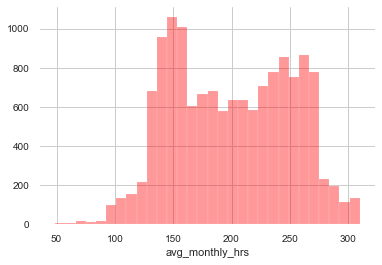

In [50]:
sns.set_style('whitegrid') 
sns.distplot(df3['avg_monthly_hrs'], kde = False, color ='red', bins = 30)

C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


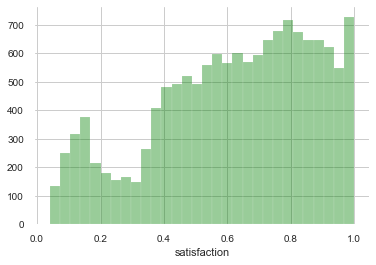

In [51]:
sns.set_style('whitegrid') 
sns.distplot(df3['satisfaction'], kde = False, color ='green', bins = 30)

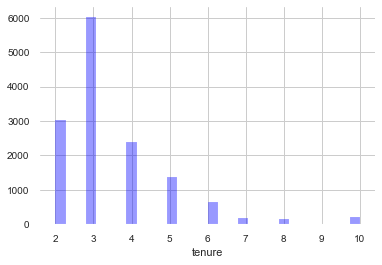

In [52]:
sns.set_style('whitegrid') 
sns.distplot(df3['tenure'], kde = False, color ='blue', bins = 30)

In [53]:
from scipy.stats import skew 
print('Skewness')
print('avg_monthly_hrs:',skew(df3['avg_monthly_hrs']))
print('satisfaction:',skew(df3['satisfaction']))
print('tenure:',skew(df3['tenure']))

Skewness
avg_monthly_hrs: 0.01721841548317176
satisfaction: nan
tenure: nan


<a id = Section43></a>
### **4.3 Pre Profiling Report**

In [17]:
profile = ProfileReport(df = df3)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


### Observation 3
##### Profiling report generated using pandas profile and following has been observered for employee_data:
- Report shows that there are total 11 variables out of which 6 are numeric, 2 are boolean and 3 are categorical.
- There is missing information of about 18.3% i.e 28451 cells.
- There exists 29 duplicate rows.
- Though missing percentage with recently_promoted is 97.9%, it appears that only those recently promoted data was updated with others left untouched (distinct count 1)
- Salary has three distinct count - low: 6909, medium: 6101, high: 1143
- Status has two distinct count - Employeed: 10784 , left: 3366
- Distinct count for employee_id is 14117 ie out of total number of observation 14150, 14117 are distinct (99.8% unquiness)
- Satisfaction and tenure are negatively correlated
- Satisfaction is positively correlated with last evaluation
- avg_monthly_hrs and n_projects are positively correlated
- Salary and Department are positivley correlated and clearly observed in phik corelation


<a id=Section5></a>

# **5. Data Pre-processing**

<a id = Section51></a>
### **5.1** [**Identification & Handling of Missing Data**]

In [160]:
df1.isnull().any().sum()

0

In [161]:
df2.isnull().any().sum()

0

In [162]:
df3.isnull().any().sum()

6

In [163]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data(df3)
missing_data

,Total,Percent
recently_promoted,13853,97.901060
filed_complaint,12104,85.540636
last_evaluation,1487,10.508834
department,707,4.996466
tenure,150,1.060071
satisfaction,150,1.060071
employee_id,0,0.000000
status,0,0.000000
salary,0,0.000000
n_projects,0,0.000000


In [164]:
df3[df3.employee_id ==0]


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
11304,167.0,NaN,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0


In [165]:
df3['recently_promoted'] = df3['recently_promoted'].fillna(0)

In [166]:
df3['filed_complaint'] = df3['filed_complaint'].fillna(0)

In [167]:
df3['satisfaction'] = df3['satisfaction'].fillna(0.621212)

In [168]:
df3['tenure'].median()

3.0

In [169]:
df3['tenure'] = df3['tenure'].fillna(df3['tenure'].median())

In [170]:
df3['last_evaluation'].median()

0.724731

In [171]:
df3['last_evaluation'] = df3['last_evaluation'].fillna(0.718399)

In [172]:
df3.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,14150.000000,14150.000000,14150.000000,14150.000000,14150.000000,14150.000000,14150.000000
mean,199.994346,0.144594,0.718399,3.778304,0.020989,0.621212,3.494064,112080.750247
std,50.833697,0.351703,0.163759,1.250162,0.143354,0.249151,1.455709,8748.202856
min,49.000000,0.000000,0.316175,1.000000,0.000000,0.040058,2.000000,0.000000
25%,155.000000,0.000000,0.579512,3.000000,0.000000,0.452824,3.000000,105772.500000
50%,199.000000,0.000000,0.718399,4.000000,0.000000,0.648124,3.000000,111291.500000
75%,245.000000,0.000000,0.857037,5.000000,0.000000,0.822965,4.000000,116650.750000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000


### Observations:
- department_data(df1) and employee_details_data (df2) has no null values
- employee_data(df3) has 06 columns with null values
recently_promoted    13853,
filed_complaint      12104,
last_evaluation       1487,
department             707,
tenure                 150,
satisfaction           150
- It was found that total 5 rows, ie, index 34,304,1234,11304 and 12304 has employee id 0
- Replaced NaN values in recently_prompted with 0
- Replaced NaN values in filed_complaint with 0
- Considering the distribution for the field satisfaction, the missing values are replaced by mean
- The missing values in tenure column field were filled by median
- Missing values in last_evaluation filled in with mean (mean and median values are very close)

<a id = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

In [173]:
print('Contains Redundant Records?:', df2.duplicated().any())
print('Duplicate Count:', df2.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


In [174]:
print('Contains Redundant Records?:', df3.duplicated().any())
print('Duplicate Count:', df3.duplicated().sum())

Contains Redundant Records?: True
Duplicate Count: 29


In [175]:
df3[df3.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14121,265.0,D00-MN,1.0,0.825672,3,0.0,low,0.545978,Employed,10.0,112373
14122,282.0,D00-SS,0.0,0.875427,6,0.0,low,0.065908,Left,4.0,116247
14123,206.0,D00-SS,0.0,1.000000,6,0.0,medium,0.783548,Left,5.0,112203
14124,161.0,D00-IT,0.0,0.715893,6,0.0,medium,0.867768,Left,4.0,108128
14125,163.0,D00-SP,0.0,0.486176,3,0.0,medium,0.832118,Employed,3.0,115446
14126,208.0,D00-FN,0.0,0.699756,4,0.0,low,0.476216,Employed,5.0,110546
14127,152.0,D00-MT,0.0,0.510016,3,0.0,low,0.826531,Employed,2.0,111968
14128,307.0,D00-IT,0.0,0.905708,7,0.0,low,0.125275,Left,4.0,111323
14129,212.0,D00-PD,0.0,0.773018,4,0.0,medium,0.829316,Employed,2.0,117454
14130,148.0,D00-MN,0.0,0.577112,3,0.0,high,0.481001,Employed,10.0,109425


In [176]:
df3.drop_duplicates(inplace = True)

In [177]:
print('Contains Redundant Records?:', df3.duplicated().any())
print('Duplicate Count:', df3.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


In [178]:
df3.shape

(14121, 11)

<a id = Section53></a>
### **5.3 Handling Typos**

In [179]:
df3.department.unique()

array([nan, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

In [180]:
df3[df3['department']=='-IT']

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
212,137.0,-IT,0.0,0.543217,2,0.0,medium,0.442070,Left,3.0,126341
278,262.0,-IT,0.0,0.901248,5,0.0,low,0.717886,Left,5.0,117187
367,134.0,-IT,0.0,0.508337,2,0.0,medium,0.456376,Left,3.0,124194
410,267.0,-IT,0.0,0.785357,5,0.0,low,0.927001,Left,5.0,119515
562,127.0,-IT,0.0,0.559907,2,0.0,medium,0.440033,Left,3.0,119346
...,...,...,...,...,...,...,...,...,...,...,...
13611,223.0,-IT,0.0,0.897100,5,0.0,medium,0.895458,Left,5.0,133677
13637,123.0,-IT,0.0,0.774735,2,0.0,medium,0.508124,Employed,4.0,107214
13655,216.0,-IT,0.0,0.736369,4,0.0,medium,0.856901,Employed,4.0,116349
13862,128.0,-IT,1.0,0.458317,3,0.0,low,0.447364,Employed,2.0,106545


In [181]:
df3['department']=df3['department'].replace('-IT', value ="D00-IT") 

In [182]:
df3.department.unique()

array([nan, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

In [183]:
df3[df3['department']=='-IT']

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


### Observation
- Replaced 207 -IT values in column department with D00-IT


<a id = Section54></a>
### **5.4 Merging**

In [184]:
merged = df2.combine_first(df3)
merged

,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,43,246.0,NaN,113558,0.0,Male,0.866838,Married,6.0,0.0,medium,0.134415,Left,4.0
1,24,134.0,NaN,112256,0.0,Female,0.555718,Unmarried,2.0,0.0,low,0.511041,Left,3.0
2,22,156.0,D00-SS,112586,1.0,Female,0.474082,Unmarried,2.0,0.0,medium,0.405101,Left,3.0
3,36,256.0,D00-SP,108071,0.0,Male,0.961360,Married,6.0,0.0,low,0.152974,Left,4.0
4,38,146.0,D00-SS,116915,0.0,Male,0.507349,Married,2.0,0.0,medium,0.434845,Left,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14240,26,NaN,NaN,111781,NaN,Male,NaN,Unmarried,NaN,NaN,NaN,NaN,NaN,NaN
14241,35,NaN,NaN,100372,NaN,Male,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN
14242,30,NaN,NaN,128083,NaN,Female,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN
14243,24,NaN,NaN,118487,NaN,Male,NaN,Unmarried,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df = merged[merged['tenure'].notna()]
df

,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,43,246.0,NaN,113558,0.0,Male,0.866838,Married,6.0,0.0,medium,0.134415,Left,4.0
1,24,134.0,NaN,112256,0.0,Female,0.555718,Unmarried,2.0,0.0,low,0.511041,Left,3.0
2,22,156.0,D00-SS,112586,1.0,Female,0.474082,Unmarried,2.0,0.0,medium,0.405101,Left,3.0
3,36,256.0,D00-SP,108071,0.0,Male,0.961360,Married,6.0,0.0,low,0.152974,Left,4.0
4,38,146.0,D00-SS,116915,0.0,Male,0.507349,Married,2.0,0.0,medium,0.434845,Left,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,33,141.0,D00-SS,116626,0.0,Male,0.537866,Married,3.0,0.0,low,0.610841,Employed,3.0
14117,53,168.0,D00-SS,112262,0.0,Male,0.643553,Married,3.0,0.0,low,0.489559,Employed,3.0
14118,24,257.0,D00-SP,108922,0.0,Male,0.718399,Unmarried,3.0,0.0,medium,0.944942,Employed,3.0
14119,33,242.0,D00-IT,113539,0.0,Male,0.836603,Married,4.0,0.0,low,0.740136,Employed,2.0


In [186]:
df.isnull().sum().sort_values(ascending=False)

department           707
tenure                 0
status                 0
satisfaction           0
salary                 0
recently_promoted      0
n_projects             0
marital_status         0
last_evaluation        0
gender                 0
filed_complaint        0
employee_id            0
avg_monthly_hrs        0
age                    0
dtype: int64

In [187]:
df[df.employee_id ==0]

,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure


In [188]:
df = df[df['department'].notna()]
df

,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,D00-SS,112586,1.0,Female,0.474082,Unmarried,2.0,0.0,medium,0.405101,Left,3.0
3,36,256.0,D00-SP,108071,0.0,Male,0.961360,Married,6.0,0.0,low,0.152974,Left,4.0
4,38,146.0,D00-SS,116915,0.0,Male,0.507349,Married,2.0,0.0,medium,0.434845,Left,3.0
5,22,135.0,D00-MT,104555,0.0,Male,0.482184,Unmarried,2.0,0.0,low,0.381545,Left,3.0
6,51,270.0,D00-PD,104706,0.0,Male,0.867087,Married,6.0,0.0,low,0.172575,Left,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,33,141.0,D00-SS,116626,0.0,Male,0.537866,Married,3.0,0.0,low,0.610841,Employed,3.0
14117,53,168.0,D00-SS,112262,0.0,Male,0.643553,Married,3.0,0.0,low,0.489559,Employed,3.0
14118,24,257.0,D00-SP,108922,0.0,Male,0.718399,Unmarried,3.0,0.0,medium,0.944942,Employed,3.0
14119,33,242.0,D00-IT,113539,0.0,Male,0.836603,Married,4.0,0.0,low,0.740136,Employed,2.0


In [189]:
df.isnull().sum().sort_values(ascending=False)

tenure               0
status               0
satisfaction         0
salary               0
recently_promoted    0
n_projects           0
marital_status       0
last_evaluation      0
gender               0
filed_complaint      0
employee_id          0
department           0
avg_monthly_hrs      0
age                  0
dtype: int64

In [190]:
print(df.loc[[12304]]) # testing

       age  avg_monthly_hrs department  employee_id  filed_complaint gender  \
12304   26            259.0    D00-ENG       112440              0.0   Male   

       last_evaluation marital_status  n_projects  recently_promoted salary  \
12304         0.505883      Unmarried         5.0                0.0    low   

       satisfaction    status  tenure  
12304      0.631046  Employed     4.0  


<a id = Section55></a>
### **5.5 Post Profiling**

In [93]:
profile = ProfileReport(df = df)
profile.to_file(output_file = 'Pre Profiling Reportafter.html')
print('Accomplished!')


Accomplished!


### Observations
- employee_data and employee_detail_data were merged and post profiling done
- it has 7 numerical, 5 categorical and 2 bool
- There are no duplicate cells
- Missing values 0%
- There is no corelation between gender and department , maritial status and department
- corelation observed between salary and department
- Rest there is no change at all in behaviour.

<a id = Section6></a>
# **6. Categorical Feature Encoding**

In [191]:
replace_map = {'department': {'D00-SS': 1, 'D00-SP': 2, 'D00-MT': 3, 'D00-PD': 4,
                                  'D00-IT': 5, 'D00-AD': 6, 'D00-MN': 7 , 'D00-ENG': 8 , 'D00-PR': 9,'D00-TP': 10,'D00-FN': 11}}



In [192]:
labels = df['department'].astype('category').cat.categories.tolist()
replace_map_comp = {'department' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'department': {'D00-AD': 1, 'D00-ENG': 2, 'D00-FN': 3, 'D00-IT': 4, 'D00-MN': 5, 'D00-MT': 6, 'D00-PD': 7, 'D00-PR': 8, 'D00-SP': 9, 'D00-SS': 10, 'D00-TP': 11}}


In [193]:
df_replace = df.copy()

In [194]:
df_replace.replace(replace_map_comp, inplace=True)

print(df_replace.head())

   age  avg_monthly_hrs  department  employee_id  filed_complaint  gender  \
2   22            156.0          10       112586              1.0  Female   
3   36            256.0           9       108071              0.0    Male   
4   38            146.0          10       116915              0.0    Male   
5   22            135.0           6       104555              0.0    Male   
6   51            270.0           7       104706              0.0    Male   

   last_evaluation marital_status  n_projects  recently_promoted  salary  \
2         0.474082      Unmarried         2.0                0.0  medium   
3         0.961360        Married         6.0                0.0     low   
4         0.507349        Married         2.0                0.0  medium   
5         0.482184      Unmarried         2.0                0.0     low   
6         0.867087        Married         6.0                0.0     low   

   satisfaction status  tenure  
2      0.405101   Left     3.0  
3      0.15297

In [195]:
df_replace.head(5)

,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,10,112586,1.0,Female,0.474082,Unmarried,2.0,0.0,medium,0.405101,Left,3.0
3,36,256.0,9,108071,0.0,Male,0.961360,Married,6.0,0.0,low,0.152974,Left,4.0
4,38,146.0,10,116915,0.0,Male,0.507349,Married,2.0,0.0,medium,0.434845,Left,3.0
5,22,135.0,6,104555,0.0,Male,0.482184,Unmarried,2.0,0.0,low,0.381545,Left,3.0
6,51,270.0,7,104706,0.0,Male,0.867087,Married,6.0,0.0,low,0.172575,Left,4.0


In [196]:
ord_2 = {'high':2, 
            'medium':1, 
            'low':0}
# apply using map
df_replace['salary'] = df_replace.salary.map(ord_2)

In [197]:
df_replace.head(5)

,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,10,112586,1.0,Female,0.474082,Unmarried,2.0,0.0,1,0.405101,Left,3.0
3,36,256.0,9,108071,0.0,Male,0.961360,Married,6.0,0.0,0,0.152974,Left,4.0
4,38,146.0,10,116915,0.0,Male,0.507349,Married,2.0,0.0,1,0.434845,Left,3.0
5,22,135.0,6,104555,0.0,Male,0.482184,Unmarried,2.0,0.0,0,0.381545,Left,3.0
6,51,270.0,7,104706,0.0,Male,0.867087,Married,6.0,0.0,0,0.172575,Left,4.0


#### 2 - High  1- Medium  2- Low

In [198]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['gender'])
df_binary = encoder.fit_transform(df_replace)

df_binary.head(5)


C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,avg_monthly_hrs,department,employee_id,filed_complaint,gender_0,gender_1,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,10,112586,1.0,0,1,0.474082,Unmarried,2.0,0.0,1,0.405101,Left,3.0
3,36,256.0,9,108071,0.0,1,0,0.961360,Married,6.0,0.0,0,0.152974,Left,4.0
4,38,146.0,10,116915,0.0,1,0,0.507349,Married,2.0,0.0,1,0.434845,Left,3.0
5,22,135.0,6,104555,0.0,1,0,0.482184,Unmarried,2.0,0.0,0,0.381545,Left,3.0
6,51,270.0,7,104706,0.0,1,0,0.867087,Married,6.0,0.0,0,0.172575,Left,4.0


In [199]:
# Column Rename
df_binary.rename(columns = {'gender_0':'Male'}, inplace = True) 
df_binary.rename(columns = {'gender_1':'Female'}, inplace = True) 
df_binary.head(5)

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,marital_status,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,10,112586,1.0,0,1,0.474082,Unmarried,2.0,0.0,1,0.405101,Left,3.0
3,36,256.0,9,108071,0.0,1,0,0.961360,Married,6.0,0.0,0,0.152974,Left,4.0
4,38,146.0,10,116915,0.0,1,0,0.507349,Married,2.0,0.0,1,0.434845,Left,3.0
5,22,135.0,6,104555,0.0,1,0,0.482184,Unmarried,2.0,0.0,0,0.381545,Left,3.0
6,51,270.0,7,104706,0.0,1,0,0.867087,Married,6.0,0.0,0,0.172575,Left,4.0


In [200]:
encoder = ce.BinaryEncoder(cols=['marital_status'])
df = encoder.fit_transform(df_binary)

df.head(5)

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,marital_status_0,marital_status_1,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,10,112586,1.0,0,1,0.474082,0,1,2.0,0.0,1,0.405101,Left,3.0
3,36,256.0,9,108071,0.0,1,0,0.961360,1,0,6.0,0.0,0,0.152974,Left,4.0
4,38,146.0,10,116915,0.0,1,0,0.507349,1,0,2.0,0.0,1,0.434845,Left,3.0
5,22,135.0,6,104555,0.0,1,0,0.482184,0,1,2.0,0.0,0,0.381545,Left,3.0
6,51,270.0,7,104706,0.0,1,0,0.867087,1,0,6.0,0.0,0,0.172575,Left,4.0


In [201]:
#df_replace['gender'] = df['gender'].replace({'Male':1, 'Female':0})
df['status'] = df['status'].replace({'Employed':1, 'Left':0})

In [202]:
df.rename(columns = {'marital_status_0':'Married'}, inplace = True) 
df.rename(columns = {'marital_status_1':'Unmarried'}, inplace = True) 
df.head(5)

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,status,tenure
2,22,156.0,10,112586,1.0,0,1,0.474082,0,1,2.0,0.0,1,0.405101,0,3.0
3,36,256.0,9,108071,0.0,1,0,0.961360,1,0,6.0,0.0,0,0.152974,0,4.0
4,38,146.0,10,116915,0.0,1,0,0.507349,1,0,2.0,0.0,1,0.434845,0,3.0
5,22,135.0,6,104555,0.0,1,0,0.482184,0,1,2.0,0.0,0,0.381545,0,3.0
6,51,270.0,7,104706,0.0,1,0,0.867087,1,0,6.0,0.0,0,0.172575,0,4.0


### Processed Employee Data

In [203]:
df.to_csv('employee_data_final.csv',index=False)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13414 entries, 2 to 14120
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                13414 non-null  int64  
 1   avg_monthly_hrs    13414 non-null  float64
 2   department         13414 non-null  int64  
 3   employee_id        13414 non-null  int64  
 4   filed_complaint    13414 non-null  float64
 5   Male               13414 non-null  int64  
 6   Female             13414 non-null  int64  
 7   last_evaluation    13414 non-null  float64
 8   Married            13414 non-null  int64  
 9   Unmarried          13414 non-null  int64  
 10  n_projects         13414 non-null  float64
 11  recently_promoted  13414 non-null  float64
 12  salary             13414 non-null  int64  
 13  satisfaction       13414 non-null  float64
 14  status             13414 non-null  int64  
 15  tenure             13414 non-null  float64
dtypes: float64(7), int64(9

In [206]:
import pandas as pd
df=pd.read_csv('employee_data_final.csv')

In [207]:
df.shape

(13414, 16)

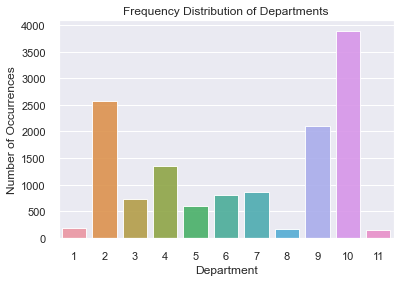

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
dep_count = df['department'].value_counts()
sns.set(style="darkgrid")
sns.barplot(dep_count.index, dep_count.values, alpha=0.9)
plt.title('Frequency Distribution of Departments')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.show()

In [154]:
df

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,tenure
0,22,156.0,10,112586,1.0,0,1,0.474082,0,1,2.0,0.0,1,0.405101,3.0
1,36,256.0,9,108071,0.0,1,0,0.961360,1,0,6.0,0.0,0,0.152974,4.0
2,38,146.0,10,116915,0.0,1,0,0.507349,1,0,2.0,0.0,1,0.434845,3.0
3,22,135.0,6,104555,0.0,1,0,0.482184,0,1,2.0,0.0,0,0.381545,3.0
4,51,270.0,7,104706,0.0,1,0,0.867087,1,0,6.0,0.0,0,0.172575,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,33,141.0,10,116626,0.0,1,0,0.537866,1,0,3.0,0.0,0,0.610841,3.0
13410,53,168.0,10,112262,0.0,1,0,0.643553,1,0,3.0,0.0,0,0.489559,3.0
13411,24,257.0,9,108922,0.0,1,0,0.718399,0,1,3.0,0.0,1,0.944942,3.0
13412,33,242.0,4,113539,0.0,1,0,0.836603,1,0,4.0,0.0,0,0.740136,2.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13414 entries, 0 to 13413
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                13414 non-null  int64  
 1   avg_monthly_hrs    13414 non-null  float64
 2   department         13414 non-null  int64  
 3   employee_id        13414 non-null  int64  
 4   filed_complaint    13414 non-null  float64
 5   Male               13414 non-null  int64  
 6   Female             13414 non-null  int64  
 7   last_evaluation    13414 non-null  float64
 8   Married            13414 non-null  int64  
 9   Unmarried          13414 non-null  int64  
 10  n_projects         13414 non-null  float64
 11  recently_promoted  13414 non-null  float64
 12  salary             13414 non-null  int64  
 13  satisfaction       13414 non-null  float64
 14  status             13414 non-null  int64  
 15  tenure             13414 non-null  float64
dtypes: float64(7), int64(9

<a id = Section7></a>
# **7. Exploratory Data Analysis**

1    10261
0     3153
Name: status, dtype: int64


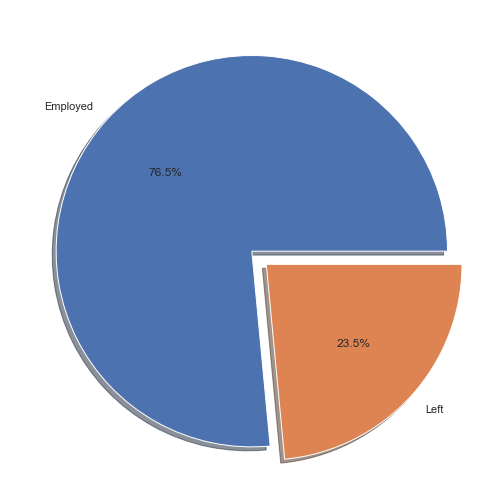

In [119]:
# Getting the count of people
leftcounts=df.status.value_counts()
print(leftcounts)

plt.figure(1, figsize=(9,9))
# Using matplotlib pie chart and label the pie chart
plt.pie(leftcounts, labels=['Employed','Left'], autopct='%1.1f%%', explode=(0,0.1), shadow=True);

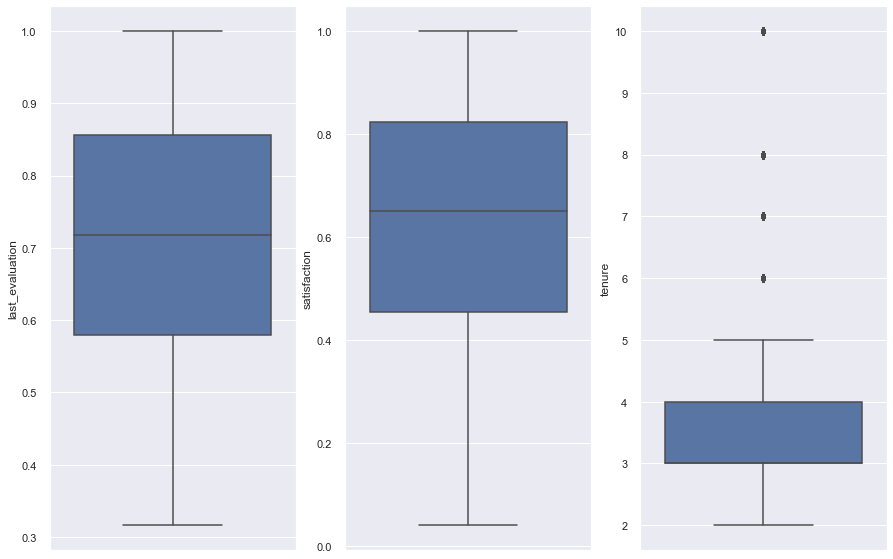

In [114]:
names = ['last_evaluation', 'satisfaction', 'tenure'] 
fig, axes =plt.subplots(1,3, figsize=(15,10))
for i,t in enumerate(names):
    sns.boxplot(y=t, data=df, orient='v', ax=axes[i] )

In [115]:
CONTINUOUS_COLUMNS = ["age", "avg_monthly_hrs", "last_evaluation", "n_projects", "satisfaction", "tenure"]

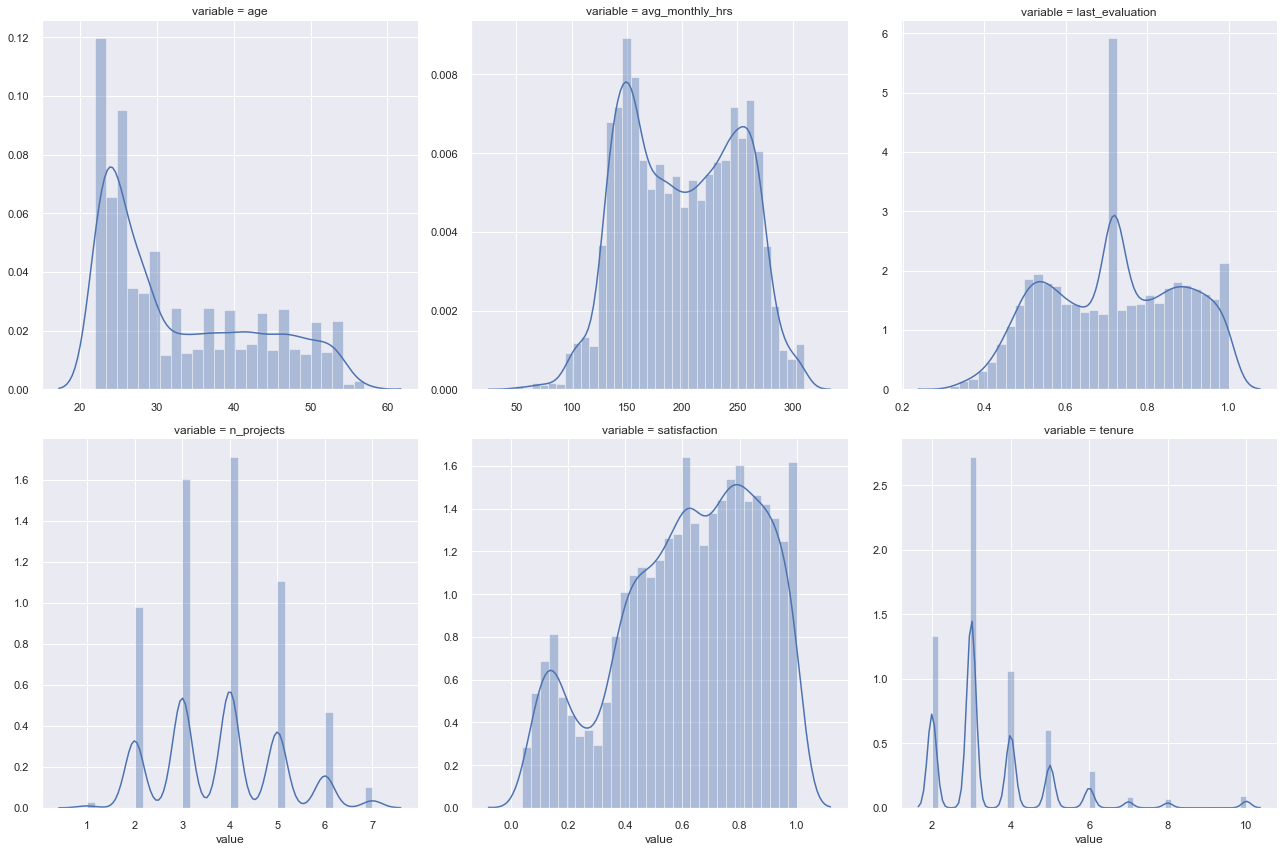

In [118]:
def plot_histgrams(data):
    f = pd.melt(df, value_vars=data)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=6)
    g = g.map(sns.distplot, "value")
plot_histgrams(df[CONTINUOUS_COLUMNS])

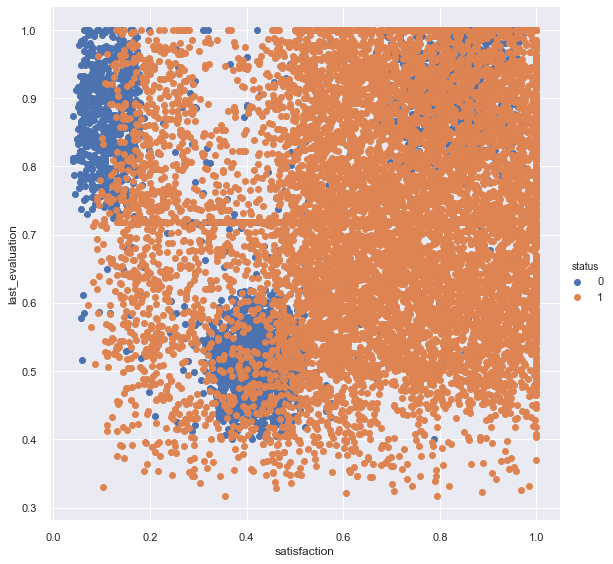

In [122]:
sns.FacetGrid(df, hue="status", height=8) \
   .map(plt.scatter, "satisfaction", "last_evaluation") \
   .add_legend()

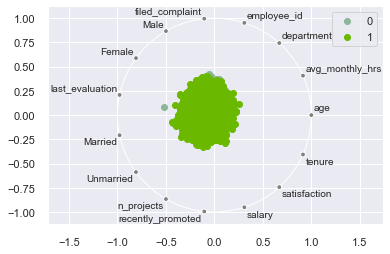

In [126]:
from pandas.plotting import radviz 
radviz(df, "status")

In [ ]:
# Portion of male female left

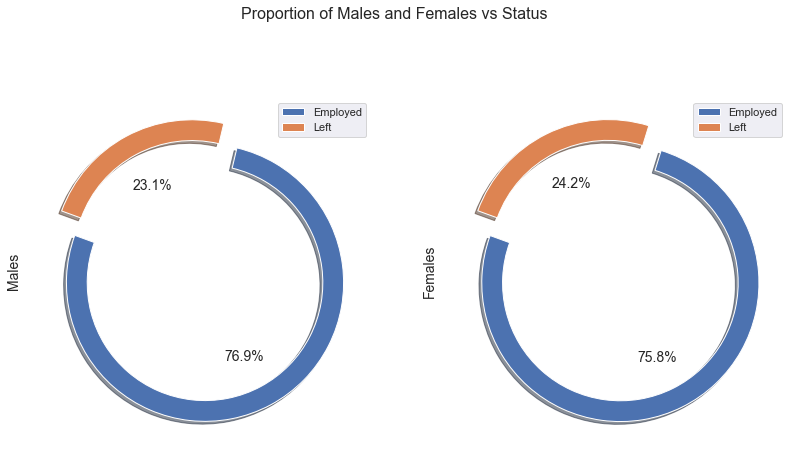

In [127]:
males_data = df[df['Male'] == 1]
females_data = df[df['Female'] == 1]

figure = plt.figure(figsize = [12, 10])
plt.subplot(1, 2, 1)
space = np.ones(2)/10
males_data['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend(['Employed', 'Left'])
plt.ylabel('Males', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
females_data['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend(['Employed', 'Left'])
plt.ylabel('Females', size = 14)
plt.suptitle('Proportion of Males and Females vs Status', size = 16)
plt.show()

In [ ]:
# Male female Vs File complaint

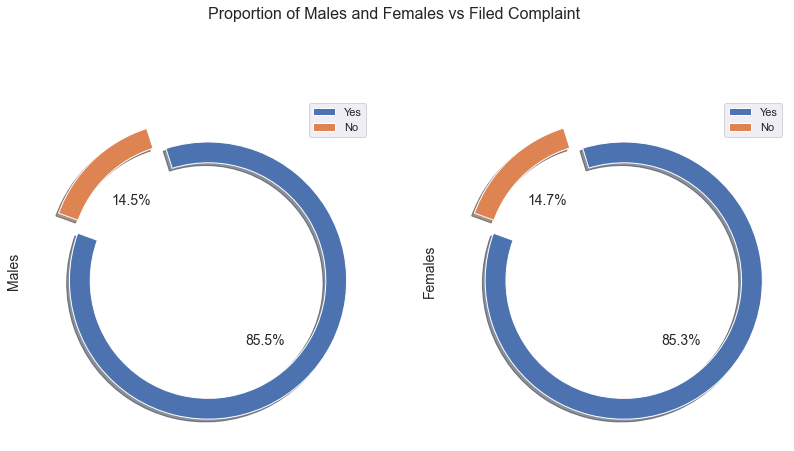

In [128]:
males_data = df[df['Male'] == 1]
females_data = df[df['Female'] == 1]

figure = plt.figure(figsize = [12, 10])
plt.subplot(1, 2, 1)
space = np.ones(2)/10
males_data['filed_complaint'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend(['Yes', 'No'])
plt.ylabel('Males', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
females_data['filed_complaint'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend(['Yes', 'No'])
plt.ylabel('Females', size = 14)
plt.suptitle('Proportion of Males and Females vs Filed Complaint', size = 16)
plt.show()

In [129]:
males_data.shape

(8823, 16)

In [130]:
females_data.shape

(4591, 16)

In [131]:
# Male employees who filed complaint and left organization

In [132]:
maleleft=males_data[(males_data['filed_complaint']==1) & (males_data['status']==0)]

In [133]:
maleleft['Male'].value_counts()

1    95
Name: Male, dtype: int64

In [134]:
# Female employees who filed complaint and left organization

In [135]:
femaleleft=females_data[(females_data['filed_complaint']==1) & (females_data['status']==0)]

In [136]:
femaleleft.shape

(51, 16)

In [137]:
# Male Female who were married and left
maleleftmarried=males_data[(males_data['Married']==1) & (males_data['status']==0)]

In [138]:
maleleftmarried['Male'].value_counts()

1    1035
Name: Male, dtype: int64

In [139]:
femaleleftmarried=females_data[(females_data['Married']==1) & (females_data['status']==0)]

In [140]:
femaleleftmarried['Female'].value_counts()

1    496
Name: Female, dtype: int64

In [141]:
tenurecountm=males_data['tenure'].value_counts()
tenurecountm

3.0     3907
2.0     1851
4.0     1493
5.0      830
6.0      398
10.0     132
7.0      120
8.0       92
Name: tenure, dtype: int64

In [142]:
tenurecountm=maleleftmarried['tenure'].value_counts()
tenurecountm

3.0    453
4.0    273
5.0    228
6.0     66
2.0     15
Name: tenure, dtype: int64

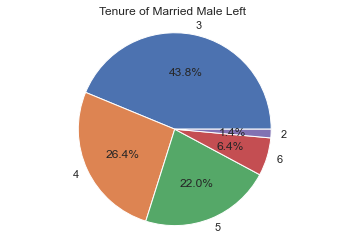

In [146]:
my_labels = '3','4','5','6','2'
plt.pie(tenurecountm,labels=my_labels,autopct='%1.1f%%')
plt.title('Tenure of Married Male Left ')
plt.axis('equal')
plt.show()

In [147]:
tenurecountf=femaleleftmarried['tenure'].value_counts()
tenurecountf

3.0    224
4.0    132
5.0    112
6.0     21
2.0      7
Name: tenure, dtype: int64

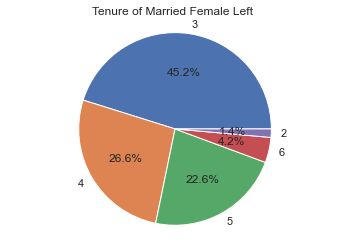

In [148]:
my_labels = '3','4','5','6','2'
plt.pie(tenurecountf,labels=my_labels,autopct='%1.1f%%')
plt.title('Tenure of Married Female Left ')
plt.axis('equal')
plt.show()


In [149]:
# Recently promoted left
maleleftrp=males_data[(males_data['recently_promoted']==1) & (males_data['status']==0)]

In [150]:
maleleftrp

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,status,tenure
419,37,292.0,2,104505,0.0,1,0,0.771532,1,0,6.0,1.0,0,0.064435,0,4.0
443,33,139.0,5,112887,0.0,1,0,0.561264,1,0,4.0,1.0,0,0.815411,0,3.0
956,29,139.0,5,113340,0.0,1,0,0.598175,0,1,4.0,1.0,0,0.798453,0,3.0
2697,26,154.0,9,103444,0.0,1,0,0.539031,0,1,2.0,1.0,1,0.404225,0,3.0
2927,22,160.0,10,110359,0.0,1,0,0.718399,0,1,2.0,1.0,0,0.423095,0,3.0
7206,37,139.0,5,104513,0.0,1,0,0.594876,1,0,4.0,1.0,0,0.803364,0,3.0
8503,26,292.0,2,111344,0.0,1,0,0.764248,0,1,6.0,1.0,0,0.146240,0,4.0
10943,27,292.0,2,101322,0.0,1,0,0.826664,0,1,6.0,1.0,0,0.132222,0,4.0
11733,26,160.0,10,116774,1.0,1,0,0.503695,0,1,2.0,1.0,0,0.436443,0,3.0


In [151]:
femaleleftrp=females_data[(females_data['recently_promoted']==1) & (females_data['status']==0)]
femaleleftrp

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,status,tenure
35,22,154.0,9,111129,0.0,0,1,0.718399,0,1,2.0,1.0,1,0.440152,0,3.0
77,25,160.0,10,128624,0.0,0,1,0.420976,0,1,2.0,1.0,0,0.375963,0,3.0
497,33,160.0,10,102157,1.0,0,1,0.495390,1,0,2.0,1.0,0,0.513384,0,3.0
688,38,258.0,10,106352,1.0,0,1,1.000000,1,0,4.0,1.0,1,0.823328,0,5.0
1027,32,160.0,10,103847,0.0,0,1,0.463752,1,0,2.0,1.0,0,0.464230,0,3.0
4058,24,160.0,10,105217,1.0,0,1,0.523097,0,1,2.0,1.0,0,0.497947,0,3.0
4382,40,138.0,4,110744,0.0,0,1,0.718399,1,0,2.0,1.0,0,0.440890,0,3.0
5023,22,154.0,9,127508,0.0,0,1,0.604842,0,1,2.0,1.0,1,0.401025,0,3.0
12802,25,138.0,4,116062,0.0,0,1,0.411200,0,1,2.0,1.0,0,0.484161,0,3.0


In [152]:
# Maximum number of employees leaving a particular department
mleft=males_data[(males_data['status']==0)]
mleft

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,status,tenure
1,36,256.0,9,108071,0.0,1,0,0.961360,1,0,6.0,0.0,0,0.152974,0,4.0
2,38,146.0,10,116915,0.0,1,0,0.507349,1,0,2.0,0.0,1,0.434845,0,3.0
3,22,135.0,6,104555,0.0,1,0,0.482184,0,1,2.0,0.0,0,0.381545,0,3.0
4,51,270.0,7,104706,0.0,1,0,0.867087,1,0,6.0,0.0,0,0.172575,0,4.0
5,54,244.0,4,118536,0.0,1,0,0.926197,1,0,6.0,0.0,1,0.061868,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,51,146.0,10,110428,0.0,1,0,0.549108,1,0,2.0,0.0,0,0.410344,0,3.0
13341,22,142.0,2,115646,0.0,1,0,0.718399,0,1,2.0,0.0,0,0.456881,0,3.0
13346,24,307.0,2,107690,0.0,1,0,0.857379,0,1,3.0,0.0,0,0.831078,0,5.0
13379,28,275.0,2,116329,0.0,1,0,0.906265,0,1,4.0,0.0,1,0.948739,0,5.0


In [153]:
fmleft=females_data[(females_data['status']==0)]
fmleft

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,22,156.0,10,112586,1.0,0,1,0.474082,0,1,2.0,0.0,1,0.405101,0,3.0
10,43,257.0,1,104544,0.0,0,1,0.886631,1,0,5.0,0.0,0,0.265318,0,5.0
18,35,151.0,10,102076,0.0,0,1,0.448019,1,0,2.0,0.0,0,0.426880,0,3.0
23,23,309.0,2,106779,0.0,0,1,0.784840,0,1,6.0,0.0,0,0.078523,0,4.0
24,23,130.0,6,115751,0.0,0,1,0.463049,0,1,2.0,0.0,0,0.401826,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,22,251.0,2,125077,0.0,0,1,0.995348,0,1,4.0,0.0,0,0.975061,0,6.0
13269,24,157.0,4,115848,0.0,0,1,0.490987,0,1,2.0,0.0,0,0.443812,0,3.0
13359,25,251.0,6,117751,0.0,0,1,0.997651,0,1,4.0,0.0,1,0.866885,0,5.0
13362,36,142.0,10,109248,0.0,0,1,0.541133,1,0,2.0,0.0,0,0.476957,0,3.0


#### Observation
- 76.5% are employeed and 23.5% are left
- outlier are observed with tenure, where as there are no outlier in last_evaluation and satisfaction
- 95 out of 8823 male employess left who filed complaint
- 51 out of 4591 female employees left who filed complaint
- 1035 out of 8823 married male left 
- 496 out of 4591 married female employees left 
- Married male, female with work expirence 3 to 5 are more likely to quit the job 
- 9 male employees who were recently promoted left out of which 3 were married,6 had tenure of 3 and 3 had tenure of 4.8 out of 9 were paid low salary and satisfaction level of 6 was below average.
- 9 female employees who were recently promoted left out of which 4 were married, 8 had tenure of 3,6 were paid salary low, satisfaction level of 8 below average. one employee 106352 who left had tenure of 5,satisfaction level 0.823328, salary-medium, and last_evaluation - 1
- out of 18 employees who left (both- male, female) - 7 employees were from D00-FN

<a id = Section8></a>
# **8. Machine Learning Models**

As this is a classification problem, we would build the below models and compare them for efficiency.
1. Logistic Regression
2. Decision Tree Clasifier
3. Random Forest Classifier
4. KNN Model
5. Naive Bayes classifier
6. SVC Model
7. Gradient Boosting Model
8. XGBoost Model

Also to demonstrate Grid Search we will obtain hyperparameters for Random Forest Classifier 

To demonstrate pipeline we whave used SVC model

<a id = Section81></a>
### **8.1 Train Test Split**

In [78]:
df=pd.read_csv('employee_data_final.csv')
df

,age,avg_monthly_hrs,department,employee_id,filed_complaint,Male,Female,last_evaluation,Married,Unmarried,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,22,156.0,10,112586,1.0,0,1,0.474082,0,1,2.0,0.0,1,0.405101,0,3.0
1,36,256.0,9,108071,0.0,1,0,0.961360,1,0,6.0,0.0,0,0.152974,0,4.0
2,38,146.0,10,116915,0.0,1,0,0.507349,1,0,2.0,0.0,1,0.434845,0,3.0
3,22,135.0,6,104555,0.0,1,0,0.482184,0,1,2.0,0.0,0,0.381545,0,3.0
4,51,270.0,7,104706,0.0,1,0,0.867087,1,0,6.0,0.0,0,0.172575,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,33,141.0,10,116626,0.0,1,0,0.537866,1,0,3.0,0.0,0,0.610841,1,3.0
13410,53,168.0,10,112262,0.0,1,0,0.643553,1,0,3.0,0.0,0,0.489559,1,3.0
13411,24,257.0,9,108922,0.0,1,0,0.718399,0,1,3.0,0.0,1,0.944942,1,3.0
13412,33,242.0,4,113539,0.0,1,0,0.836603,1,0,4.0,0.0,0,0.740136,1,2.0


In [79]:
df.shape

(13414, 16)

In [80]:
df.columns

Index(['age', 'avg_monthly_hrs', 'department', 'employee_id',
       'filed_complaint', 'Male', 'Female', 'last_evaluation', 'Married',
       'Unmarried', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'status', 'tenure'],
      dtype='object')

In [81]:
y = df.status

In [82]:
from sklearn.model_selection import train_test_split
X = df[['age', 'avg_monthly_hrs', 'department', 'employee_id',
       'filed_complaint', 'Male', 'Female', 'last_evaluation', 'Married',
       'Unmarried', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'tenure']]
y = df.status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (10731, 15)
Y Train Shape  (10731,)
X Test Shape  (2683, 15)
Y Test Shape  (2683,)


<a id = Section82></a>
### **8.2 Cross Validation**

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

To implement cross validation, the cross_val_score method of the sklearn.model_selection library can be used. The cross_val_score returns the accuracy for all the folds. Values for 4 parameters are required to be passed to the cross_val_score class. The first parameter is estimator which basically specifies the algorithm that you want to use for cross validation. The second and third parameters, X and y, contain the X_train and y_train data i.e. features and labels. Finally the number of folds is passed to the cv parameter as shown in the following code:

In [84]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [85]:
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[0.97671169 0.97205403 0.97158826 0.97296037 0.97622378]
0.9739076262970068
0.002141956472184483


### Observation
The result is: 0.0021 which is 0.21%. This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

In [86]:
classifier.fit( X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<a id = Section83></a>
### **8.3 Feature Importance**

Female 0.0029042123897491685
Male 0.002943739697938306
Married 0.002417875406670154
Unmarried 0.0024732907392561944
age 0.01882771992682642
avg_monthly_hrs 0.1705084734219403
department 0.017472432815701315
employee_id 0.029134942418997566
filed_complaint 0.010719015130170385
last_evaluation 0.10770644004373217
n_projects 0.19205828051563648
recently_promoted 0.0021084340530393704
salary 0.014423523633781122
satisfaction 0.24386501398791643
tenure 0.18243660581864465


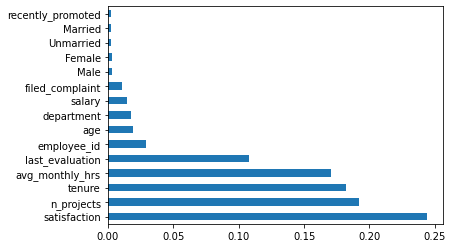

In [87]:
feat_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
for i, j in sorted(zip(X_train.columns, classifier.feature_importances_)):
    print(i, j)

<a id = Section84></a>
### **8.4 Scaling**

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

label = df.pop('status')

sc.fit(df)                                                                                   # fit the data to Standardscaler

df_scale = sc.transform(df)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(df_scale, columns=df.columns).head())                                  # Put it to dataframe                              


After standardizing our features, the first 5 rows of our data now look like this:

        age  avg_monthly_hrs  department  employee_id  filed_complaint  \
0 -1.091027        -0.866406    1.068575     0.055651         2.421029   
1  0.314836         1.100230    0.759955    -0.476710        -0.413048   
2  0.515674        -1.063070    1.068575     0.566082        -0.413048   
3 -1.091027        -1.279400   -0.165906    -0.891280        -0.413048   
4  1.821118         1.375559    0.142714    -0.873475        -0.413048   

       Male    Female  last_evaluation   Married  Unmarried  n_projects  \
0 -1.386291  1.386291        -1.493309 -0.975694   0.975694   -1.426413   
1  0.721349 -0.721349         1.485792  1.024911  -1.024911    1.772567   
2  0.721349 -0.721349        -1.289923  1.024911  -1.024911   -1.426413   
3  0.721349 -0.721349        -1.443776 -0.975694   0.975694   -1.426413   
4  0.721349 -0.721349         0.909429  1.024911  -1.024911    1.772567   

   recently_promoted

In [89]:
df_scale.shape

(13414, 15)

In [90]:
X = df_scale

In [91]:
#Seperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10731, 15)
(2683, 15)
(10731,)
(2683,)


<a id = Section85></a>
### **8.5 Models**

In [92]:
from sklearn.metrics import accuracy_score

### 1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_pred_test = logreg.predict(X_test)

# Accuracy score
logreg_ac = accuracy_score(y_test, y_pred_test)*100
print('Accuracy is :',logreg_ac)

Accuracy is : 79.53783078643309


### 2. KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =1 )
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [96]:
y_pred_test3 = knn.predict(X_test)

knn_ac = accuracy_score(y_test,y_pred_test3)*100
print('Accuracy is :',knn_ac)

Accuracy is : 92.69474468878121


### 3. SVC

In [97]:
from sklearn.svm import SVC
svc = SVC(random_state = 0,gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [98]:
y_pred_test5 = svc.predict(X_test)

In [99]:
svc_ac = accuracy_score(y_test,y_pred_test5)*100
print('Accuracy is :',svc_ac)

Accuracy is : 94.96831904584421


### 4. Decision Trees

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state = 0)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [101]:
y_pred_test1 = dtmodel.predict(X_test)

DecisionT_Accuracy = accuracy_score(y_test,y_pred_test1)*100
print('Accuracy:', DecisionT_Accuracy)

Accuracy: 96.3473723443906


### 5. Random Forest Classifier without Grid Search

In [102]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [104]:
y_pred_test2 = rfc.predict(X_test)

rfc_ac = accuracy_score(y_test,y_pred_test2)*100
print('Accuracy is :',rfc_ac)

Accuracy is : 98.09914275065226


### 6. Random Forest Classifier without Grid Search

## GridSearch

A machine learning model has two types of parameters. The first type of parameters are the parameters that are learned through a machine learning model while the second type of parameters are the hyper parameter that we pass to the machine learning model.

Normally we randomly set the value for these hyper parameters and see what parameters result in best performance. However randomly selecting the parameters for the algorithm can be exhaustive.

Also, it is not easy to compare performance of different algorithms by randomly setting the hyper parameters because one algorithm may perform better than the other with different set of parameters. And if the parameters are changed, the algorithm may perform worse than the other algorithms.

Therefore, instead of randomly selecting the values of the parameters, a better approach would be to develop an algorithm which automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

In [105]:
from sklearn.model_selection import GridSearchCV

The first step you need to perform is to create a dictionary of all the parameters and their corresponding set of values that you want to test for best performance. The name of the dictionary items corresponds to the parameter name and the value corresponds to the list of values for the parameter.

Let's create a dictionary of parameters and their corresponding values for our Random Forest algorithm. Details of all the parameters for the random forest algorithm are available in the Scikit-Learn docs.

In [106]:
# Parameters for random forest
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}


Here we create grid_param dictionary with three parameters n_estimators, criterion, and bootstrap. The parameter values that we want to try out are passed in the list. For instance, in the above script we want to find which value (out of 100, 300, 500, 800, and 1000) provides the highest accuracy.

Similarly, we want to find which value results in the highest performance for the criterion parameter: "gini" or "entropy"? The Grid Search algorithm basically tries all possible combinations of parameter values and returns the combination with the highest accuracy. For instance, in the above case the algorithm will check 20 combinations (5 x 2 x 2 = 20).

The Grid Search algorithm can be very slow, owing to the potentially huge number of combinations to test. Furthermore, cross validation further increases the execution time and complexity.

In [107]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

Once the parameter dictionary is created, the next step is to create an instance of the GridSearchCV class. You need to pass values for the estimator parameter, which basically is the algorithm that you want to execute. The param_grid parameter takes the parameter dictionary that we just created as parameter, the scoring parameter takes the performance metrics, the cv parameter corresponds to number of folds, which is 5 in our case, and finally the n_jobs parameter refers to the number of CPU's that you want to use for execution. A value of -1 for n_jobs parameter means that use all available computing power. 

In [108]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [109]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}


In [110]:
best_result = gd_sr.best_score_
print(best_result)

0.9736278072872985


### Observation
- The result shows that the highest accuracy is achieved when the n_estimators are 100, bootstrap is False and criterion is "gini".
- The accuracy achieved is 97.39%

In [113]:
rfc1 = RandomForestClassifier(bootstrap=False,criterion='gini',n_estimators=500,random_state=0)
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [114]:
y_pred_test21 = rfc1.predict(X_test)

rfc_ac1 = accuracy_score(y_test,y_pred_test2)*100
print('Accuracy is :',rfc_ac1)

Accuracy is : 98.09914275065226


### 7. Naive Bayes classifier

In [134]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
y_pred_test4 = nb.predict(X_test)

nb_ac = accuracy_score(y_test,y_pred_test4)*100
print('Accuracy is :',nb_ac)

Accuracy is : 79.79873276183376


### 8. Gradient Boosting Model

In [136]:
gb_model= GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=1)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
y_pred_test6 = gb_model.predict(X_test)

gb_ac = accuracy_score(y_test,y_pred_test6)*100
print('Accuracy is :',gb_ac)

Accuracy is : 97.5773387998509


### 9. XGBoost Model

In [138]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(random_state=1,learning_rate=0.10)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
y_pred_test7=xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test,y_pred_test7)*100
print('Accuracy is :',xgb_ac)

Accuracy is : 97.95005590756615


### 10. Pipeline (SVC)

In [140]:
from sklearn.pipeline import Pipeline

In [141]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False))]

In [142]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train,cv=5)
scores

C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\l

{'fit_time': array([0.11092281, 0.05536747, 0.03519273, 0.070328  , 0.02673793]),
 'score_time': array([0.        , 0.        , 0.        , 0.00199461, 0.        ]),
 'test_score': array([0.78435026, 0.78471575, 0.79077353, 0.78145387, 0.78657968])}

In [143]:
clfs = []
clfs.append(LogisticRegression(solver='lbfgs'))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(GaussianNB())
clfs.append(SVC())
clfs.append(GradientBoostingClassifier())
clfs.append(XGBClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train,cv=5)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
fit_time  mean  0.04266643524169922
fit_time  std  0.034744878418991085
score_time  mean  0.005137968063354492
score_time  std  0.0035491331772268438
test_score  mean  0.7855746178698815
test_score  std  0.0030742857178161836
---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False

C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ve

---------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.10174880027770997
fit_time  std  0.028243867640620864
score_time  mean  0.003758668899536133
score_time  std  0.0036256904058534893
test_score  mean  0.9694345390151888
test_score  std  0.0036389318232245573
---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights=

In [144]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= SVC())
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False))]

In [145]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : np.linspace(0.1,1.2,12)
})

cv_grid.fit(X_train, y_train)

C:\Users\ChitraDesai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('normalizer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
       

In [146]:
cv_grid.best_params_

{'clf__C': 1.2, 'clf__kernel': 'rbf'}

In [147]:
cv_grid.best_estimator_

Pipeline(memory=None,
         steps=[('normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [148]:
cv_grid.best_score_

0.9452054794520548

In [149]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 94.968%


<a id = Section86></a>
### **8.6 Model Ranking**

In [150]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN','SVC','SVC using Pipeline','Decision Tree','Random Forest WithGS','Random Forest WithoutGS','Naive Bayes classifier','Gradient Boosting Model','XGBoost Model'],
        'Accuracy_score' : [logreg_ac, knn_ac,svc_ac,accuracy*100,DecisionT_Accuracy,rfc_ac1,rfc_ac,nb_ac,gb_ac,xgb_ac]
    })
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
5,Random Forest WithGS,98.099143
6,Random Forest WithoutGS,98.099143
9,XGBoost Model,97.950056
8,Gradient Boosting Model,97.577339
4,Decision Tree,96.347372
2,SVC,94.968319
3,SVC using Pipeline,94.968319
1,kNN,92.694745
7,Naive Bayes classifier,79.798733
0,Logistic Regression,79.537831


<a id = Section9></a>

---
# **9. Processing of Unseen Data**


In [4]:
# Import the unseen data
unseenData = pd.read_csv('https://docs.google.com/spreadsheets/d/1QNeMmV0PiNoCMSivz7ScZ8NCAOUWP_ThmUNikEMFNIY/export?gid=1947002331&format=csv') # if needed index_col=0
unseenData.to_csv('unseenData.csv')
unseenData.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [3]:
unseenData=pd.read_csv('unseenData.csv')

In [4]:
unseenData.shape

(100, 10)

In [5]:
unseenData.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure',
       'employee_id'],
      dtype='object')

In [6]:
print(unseenData['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan 'D00-AD']


In [7]:
unseenData.isnull().sum()[unseenData.isnull().sum() !=0]

department            2
filed_complaint      85
last_evaluation      17
recently_promoted    97
satisfaction          3
tenure                3
dtype: int64

In [8]:
unseenData['recently_promoted'] = unseenData['recently_promoted'].fillna(0)

In [9]:
unseenData['satisfaction'] = unseenData['satisfaction'].fillna(0.621212)

In [10]:
unseenData['last_evaluation'] = unseenData['last_evaluation'].fillna(0.724731)

In [11]:
unseenData['tenure'] = unseenData['tenure'].fillna(3)

In [12]:
unseenData['filed_complaint'] = unseenData['filed_complaint'].fillna(0)

In [13]:
unseenData.isnull().any().sum()

1

In [15]:
print(unseenData['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan 'D00-AD']


In [16]:
unseenData.department.value_counts()

D00-SS     27
D00-ENG    18
D00-SP     14
D00-IT      9
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
D00-PR      1
D00-AD      1
Name: department, dtype: int64

In [17]:
# fill the missing values with dept_name : D00-SS.i.e. the Sales department as most of the employees are from this department
unseenData['department'].fillna('D00-SS',inplace=True)

In [18]:
unseenData.isnull().any().sum()

0

In [22]:
unseenData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [47]:
df2=pd.read_csv('employee_details_data.csv')
df2.head(5)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [49]:
df_DataForPred = pd.merge(unseenData, df2, how='left', on="employee_id")

In [50]:
df_DataForPred.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,0.0,0.528841,2,0.0,low,0.400464,3.0,119045,27,Male,Unmarried
1,221,D00-PD,0.0,0.784561,2,0.0,low,0.759513,3.0,112223,23,Male,Unmarried
2,156,D00-SS,0.0,0.545183,2,0.0,medium,0.336457,3.0,103924,26,Male,Unmarried
3,133,D00-PR,0.0,0.724731,4,0.0,medium,0.832039,2.0,105922,52,Male,Married
4,135,D00-SS,0.0,0.454637,2,0.0,low,0.320723,5.0,103297,27,Male,Unmarried


In [51]:
df_DataForPred.shape

(100, 13)

In [53]:
### Categorical feature encoding

In [57]:
replace_map = {'department': {'D00-SS': 1, 'D00-SP': 2, 'D00-MT': 3, 'D00-PD': 4,
                                  'D00-IT': 5, 'D00-AD': 6, 'D00-MN': 7 , 'D00-ENG': 8 , 'D00-PR': 9,'D00-TP': 10,'D00-FN': 11}}

In [58]:
labels = unseenData['department'].astype('category').cat.categories.tolist()
replace_map_comp = {'department' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'department': {'D00-AD': 1, 'D00-ENG': 2, 'D00-FN': 3, 'D00-IT': 4, 'D00-MN': 5, 'D00-MT': 6, 'D00-PD': 7, 'D00-PR': 8, 'D00-SP': 9, 'D00-SS': 10, 'D00-TP': 11}}


In [59]:
df_replace = df_DataForPred.copy()

In [60]:
df_replace.shape

(100, 13)

In [64]:
ord_2 = {'high':2, 
            'medium':1, 
            'low':0}
# apply using map
df_replace['salary'] = df_replace.salary.map(ord_2)

In [61]:
df_replace.replace(replace_map_comp, inplace=True)

print(df_replace.head())

   avg_monthly_hrs  department  filed_complaint  last_evaluation  n_projects  \
0              134           4              0.0         0.528841           2   
1              221           7              0.0         0.784561           2   
2              156          10              0.0         0.545183           2   
3              133           8              0.0         0.724731           4   
4              135          10              0.0         0.454637           2   

   recently_promoted  salary  satisfaction  tenure  employee_id  age gender  \
0                0.0     low      0.400464     3.0       119045   27   Male   
1                0.0     low      0.759513     3.0       112223   23   Male   
2                0.0  medium      0.336457     3.0       103924   26   Male   
3                0.0  medium      0.832039     2.0       105922   52   Male   
4                0.0     low      0.320723     5.0       103297   27   Male   

  marital_status  
0      Unmarried  
1     

In [66]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['gender'])
df_binary = encoder.fit_transform(df_replace)

df_binary.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender_0,gender_1,marital_status
0,134,4,0.0,0.528841,2,0.0,0,0.400464,3.0,119045,27,0,1,Unmarried
1,221,7,0.0,0.784561,2,0.0,0,0.759513,3.0,112223,23,0,1,Unmarried
2,156,10,0.0,0.545183,2,0.0,1,0.336457,3.0,103924,26,0,1,Unmarried
3,133,8,0.0,0.724731,4,0.0,1,0.832039,2.0,105922,52,0,1,Married
4,135,10,0.0,0.454637,2,0.0,0,0.320723,5.0,103297,27,0,1,Unmarried


In [67]:
# Column Rename
df_binary.rename(columns = {'gender_0':'Male'}, inplace = True) 
df_binary.rename(columns = {'gender_1':'Female'}, inplace = True) 
df_binary.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,Male,Female,marital_status
0,134,4,0.0,0.528841,2,0.0,0,0.400464,3.0,119045,27,0,1,Unmarried
1,221,7,0.0,0.784561,2,0.0,0,0.759513,3.0,112223,23,0,1,Unmarried
2,156,10,0.0,0.545183,2,0.0,1,0.336457,3.0,103924,26,0,1,Unmarried
3,133,8,0.0,0.724731,4,0.0,1,0.832039,2.0,105922,52,0,1,Married
4,135,10,0.0,0.454637,2,0.0,0,0.320723,5.0,103297,27,0,1,Unmarried


In [70]:
encoder = ce.BinaryEncoder(cols=['marital_status'])
dfunseen = encoder.fit_transform(df_binary)

dfunseen.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,Male,Female,marital_status_0,marital_status_1
0,134,4,0.0,0.528841,2,0.0,0,0.400464,3.0,119045,27,0,1,0,1
1,221,7,0.0,0.784561,2,0.0,0,0.759513,3.0,112223,23,0,1,0,1
2,156,10,0.0,0.545183,2,0.0,1,0.336457,3.0,103924,26,0,1,0,1
3,133,8,0.0,0.724731,4,0.0,1,0.832039,2.0,105922,52,0,1,1,0
4,135,10,0.0,0.454637,2,0.0,0,0.320723,5.0,103297,27,0,1,0,1


In [72]:
dfunseen.rename(columns = {'marital_status_0':'Married'}, inplace = True) 
dfunseen.rename(columns = {'marital_status_1':'Unmarried'}, inplace = True) 
dfunseen.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,Male,Female,Married,Unmarried
0,134,4,0.0,0.528841,2,0.0,0,0.400464,3.0,119045,27,0,1,0,1
1,221,7,0.0,0.784561,2,0.0,0,0.759513,3.0,112223,23,0,1,0,1
2,156,10,0.0,0.545183,2,0.0,1,0.336457,3.0,103924,26,0,1,0,1
3,133,8,0.0,0.724731,4,0.0,1,0.832039,2.0,105922,52,0,1,1,0
4,135,10,0.0,0.454637,2,0.0,0,0.320723,5.0,103297,27,0,1,0,1


In [71]:
dfunseen.shape

(100, 15)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(dfunseen)                                                                                   # fit the data to Standardscaler

df_scale = sc.transform(dfunseen)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(dfunseen, columns=dfunseen.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

   avg_monthly_hrs  department  filed_complaint  last_evaluation  n_projects  \
0              134           4              0.0         0.528841           2   
1              221           7              0.0         0.784561           2   
2              156          10              0.0         0.545183           2   
3              133           8              0.0         0.724731           4   
4              135          10              0.0         0.454637           2   

   recently_promoted  salary  satisfaction  tenure  employee_id  age  Male  \
0                0.0       0      0.400464     3.0       119045   27     0   
1                0.0       0      0.759513     3.0       112223   23     0   
2                0.0       1      0.336457     3.0       103924   26     0   
3                0.0       1      0.832039     2.0       105922   52     0   
4                0.0       0      0.320723   

In [116]:
dfunseen.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure',
       'employee_id', 'age', 'Male', 'Female', 'Married', 'Unmarried'],
      dtype='object')

In [117]:
dfunseen.shape

(100, 15)

In [119]:
X1 = dfunseen[['age', 'avg_monthly_hrs', 'department', 'employee_id',
       'filed_complaint', 'Male', 'Female', 'last_evaluation', 'Married',
       'Unmarried', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'tenure']]
X1.shape

(100, 15)

In [120]:
y_pred_unseenData  = rfc1.predict(X1)

y_pred_unseenData_probability = rfc1.predict_proba(X1)
preds = y_pred_unseenData_probability[:,1]
print (y_pred_unseenData.shape, y_pred_unseenData_probability.shape, preds.shape)

(100,) (100, 2) (100,)


In [121]:
y_pred_df = pd.DataFrame(y_pred_unseenData, columns=['status'])
y_pred_proba_df = pd.DataFrame(preds, columns=['Probability to Leave'])

In [122]:
print (y_pred_df.columns, y_pred_proba_df.columns)

Index(['status'], dtype='object') Index(['Probability to Leave'], dtype='object')


In [123]:
decimals = 2    
y_pred_proba_df['Probability to Leave'] = y_pred_proba_df['Probability to Leave'].apply(lambda x: round(x, decimals))

In [124]:
print(y_pred_df.head())
print(y_pred_proba_df.head())

   status
0       1
1       1
2       0
3       0
4       0
   Probability to Leave
0                  0.51
1                  0.55
2                  0.50
3                  0.39
4                  0.49


In [125]:
y_pred_df.status.value_counts()

1    59
0    41
Name: status, dtype: int64

<a id = Section10></a>

---
# **10. Publishing the Results**



In [127]:
empColumn = dfunseen[['employee_id']]
empColumn.shape

(100, 1)

In [128]:
df_final_publish = pd.concat([empColumn, y_pred_proba_df], axis=1)

In [129]:
df_final_publish.columns

Index(['employee_id', 'Probability to Leave'], dtype='object')

In [130]:
df_final_publish.describe()

,employee_id,Probability to Leave
count,100.000000,100.000000
mean,112515.750000,0.485900
std,9466.676715,0.069806
min,100230.000000,0.330000
25%,105855.000000,0.407500
50%,110557.000000,0.515000
75%,117130.250000,0.540000
max,145105.000000,0.570000


In [131]:
df_final_publish.head()

,employee_id,Probability to Leave
0,119045,0.51
1,112223,0.55
2,103924,0.50
3,105922,0.39
4,103297,0.49
